In [4]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
df = pd.read_csv('indian_food.csv')

In [6]:
df.head()

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
0,Balu shahi,"Maida flour, yogurt, oil, sugar",vegetarian,45,25,sweet,dessert,West Bengal,East
1,Boondi,"Gram flour, ghee, sugar",vegetarian,80,30,sweet,dessert,Rajasthan,West
2,Gajar ka halwa,"Carrots, milk, sugar, ghee, cashews, raisins",vegetarian,15,60,sweet,dessert,Punjab,North
3,Ghevar,"Flour, ghee, kewra, milk, clarified butter, su...",vegetarian,15,30,sweet,dessert,Rajasthan,West
4,Gulab jamun,"Milk powder, plain flour, baking powder, ghee,...",vegetarian,15,40,sweet,dessert,West Bengal,East


In [8]:
df.columns = ['Name','Ingredients','Diet','Preperation Time', 'Cooking Time','Flavour','Course','State','Region']

In [9]:
df.head()

,Name,Ingredients,Diet,Preperation Time,Cooking Time,Flavour,Course,State,Region
0,Balu shahi,"Maida flour, yogurt, oil, sugar",vegetarian,45,25,sweet,dessert,West Bengal,East
1,Boondi,"Gram flour, ghee, sugar",vegetarian,80,30,sweet,dessert,Rajasthan,West
2,Gajar ka halwa,"Carrots, milk, sugar, ghee, cashews, raisins",vegetarian,15,60,sweet,dessert,Punjab,North
3,Ghevar,"Flour, ghee, kewra, milk, clarified butter, su...",vegetarian,15,30,sweet,dessert,Rajasthan,West
4,Gulab jamun,"Milk powder, plain flour, baking powder, ghee,...",vegetarian,15,40,sweet,dessert,West Bengal,East


In [39]:
df.dropna(how = 'any', inplace = True)

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 203 entries, 0 to 253
Data columns (total 9 columns):
Name                203 non-null object
Ingredients         203 non-null object
Diet                203 non-null object
Preperation Time    203 non-null int64
Cooking Time        203 non-null float64
Flavour             203 non-null object
Course              203 non-null object
State               203 non-null object
Region              203 non-null object
dtypes: float64(1), int64(1), object(7)
memory usage: 15.9+ KB


# Proportion of Vegetarian & Non Vegetarian dishes

In [73]:
labels = df['Diet'].value_counts().index
values = df['Diet'].value_counts().values
colors = ['Red','Green']

Text(0.5, 1.0, 'Percentage of Vegetarian & Non- Vegetarian dishes ')

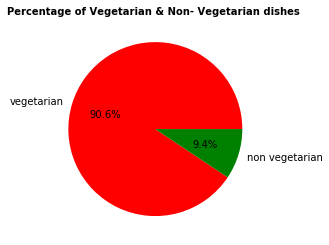

In [74]:
plt.pie(values,labels = labels,colors = colors, autopct = '%1.1f%%')
plt.title('Percentage of Vegetarian & Non- Vegetarian dishes ', fontdict = {'fontweight':'bold','fontsize': 10})

# Number of Dishes by Region

Text(0.5, 1.0, 'Dishes by Region')

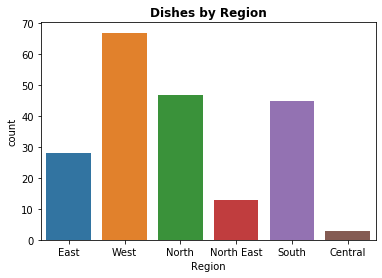

In [76]:
sns.countplot(x = 'Region', data = df)
plt.title('Dishes by Region', fontdict = {'fontweight':'bold'})

# Dishes based on Course Meal

Text(0.5, 1.0, 'Dishes based on Course Meal')

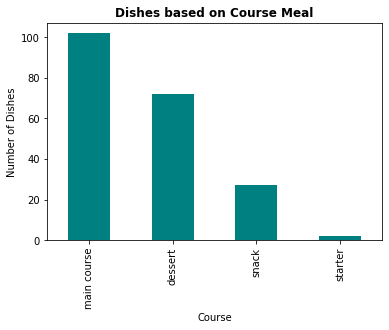

In [77]:
df['Course'].value_counts().plot(kind = 'bar', color = 'teal')
plt.xlabel('Course')
plt.ylabel('Number of Dishes')
plt.title('Dishes based on Course Meal', fontdict = {'fontweight': 'bold'})

# Proportion of Flavour used

Text(0, 0.5, 'Count')

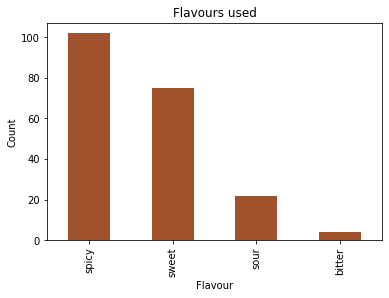

In [79]:
df['Flavour'].value_counts().plot(kind = 'bar',color = 'sienna')
plt.title('Flavours used')
plt.xlabel('Flavour')
plt.ylabel('Count')

# Top 5 food items with longest cooking time

In [80]:
long = df.sort_values('Cooking Time', ascending = False).head(5).iloc[0:6,[0,4]]

In [81]:
long

,Name,Cooking Time
62,Shrikhand,720.0
114,Pindi chana,120.0
27,Malapua,120.0
75,Biryani,120.0
34,Rasgulla,90.0


In [82]:
names = long['Name']
values = long['Cooking Time']

Text(0, 0.5, 'Cooking Time')

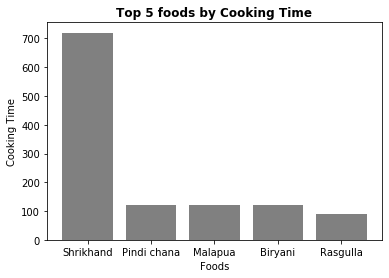

In [83]:
plt.bar(names,values, color = 'grey')
plt.title('Top 5 foods by Cooking Time', fontdict = {'fontweight' : 'bold'})
plt.xlabel('Foods')
plt.ylabel('Cooking Time')

# Top 5 Foods with Shortest Cooking Time

In [87]:
short = df.sort_values('Cooking Time').head(5)

In [88]:
short

,Name,Ingredients,Diet,Preperation Time,Cooking Time,Flavour,Course,State,Region
147,Papadum,"Lentils, black pepper, vegetable oil",vegetarian,5,5.0,spicy,snack,Kerala,South
11,Lassi,"Yogurt, milk, nuts, sugar",vegetarian,5,5.0,sweet,dessert,Punjab,North
212,Lilva Kachori,"Green garlic chutney, fresh green peas, ginger...",vegetarian,30,6.0,spicy,snack,Gujarat,West
195,Koshimbir,"Cucumber, carrot, tomatoes, cilantro",vegetarian,10,10.0,spicy,main course,Maharashtra,West
207,Surnoli,"Rice flakes, yogurt, raw rice, jaggery, grated...",vegetarian,60,10.0,spicy,snack,Maharashtra,West


In [89]:
names = short['Name']
values = short['Cooking Time']

Text(0, 0.5, 'Time')

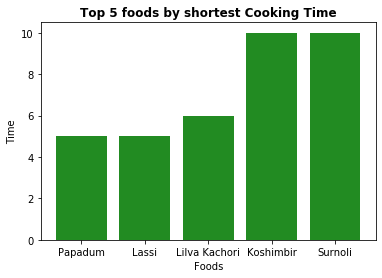

In [92]:
plt.bar(names,values,color = 'forestgreen')
plt.title('Top 5 foods by shortest Cooking Time', fontdict = {'fontweight' : 'bold'})
plt.xlabel('Foods')
plt.ylabel('Time')

# Top 5 Foods with Longest Preperation Time

In [100]:
prep = df.sort_values('Preperation Time', ascending = False).head(5)

In [101]:
names = prep['Name']
values = prep['Preperation Time']

Text(0, 0.5, 'Time')

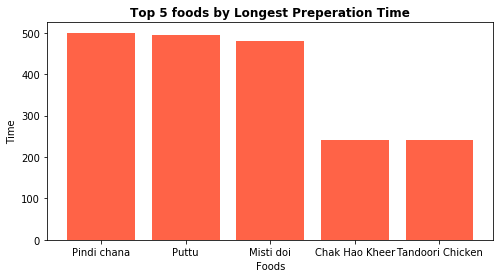

In [109]:
plt.figure(figsize = (8,4))
plt.bar(names,values, color = 'tomato')
plt.title('Top 5 foods by Longest Preperation Time', fontdict = {'fontweight' : 'bold'})
plt.xlabel('Foods')
plt.ylabel('Time')

# Top 5 Snacks with Longest Cooking Time

In [113]:
snack = df[df['Course'] == 'snack']

In [116]:
snack_cooking = snack.sort_values('Cooking Time',ascending = False).head()

In [117]:
snack_cooking

,Name,Ingredients,Diet,Preperation Time,Cooking Time,Flavour,Course,State,Region
90,Kachori,"Moong dal, rava, garam masala, dough, fennel s...",vegetarian,30,60.0,spicy,snack,Uttar Pradesh,North
89,Fara,"Chana dal, whole wheat flour, arhar dal, white...",vegetarian,10,60.0,spicy,snack,Chhattisgarh,Central
192,Khandvi,"Green chili paste, white sesame seeds, gram fl...",vegetarian,20,45.0,spicy,snack,Gujarat,West
131,Kanji,"Carrot, yellow mustard, red chilli, black salt",vegetarian,10,45.0,sour,snack,Kerala,South
199,Patra,"Arbi ke patte, sesame seeds, gur, bengal gram ...",vegetarian,10,40.0,spicy,snack,Gujarat,West


In [118]:
names = snack_cooking['Name']
values = snack_cooking['Cooking Time']

Text(0.5, 1.0, 'Snacks with Longest Cooking Time')

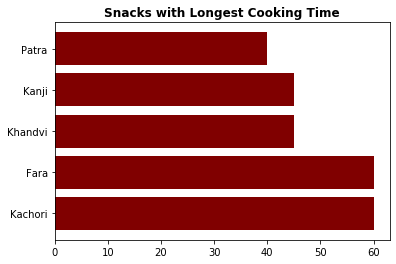

In [122]:
plt.barh(names, values, color = 'maroon')
plt.title('Snacks with Longest Cooking Time', fontdict = {'fontweight' : 'bold'})

# Dessert with Longest Preperation Time

In [127]:
dessert = df[df['Course'] == 'dessert']

In [131]:
dessert_cook = dessert.sort_values('Cooking Time', ascending = False).head()

In [132]:
names = dessert_cook['Name']
values = dessert_cook['Cooking Time']

Text(0.5, 1.0, 'Dessert with Longest Cooking Time')

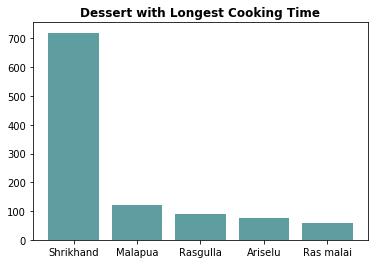

In [135]:
plt.bar(names,values, color = 'cadetblue')
plt.title('Dessert with Longest Cooking Time', fontdict = {'fontweight' : 'bold'})

# Main Course with Longest Cooking Time

In [140]:
mc = df[df['Course'] == 'main course']

In [144]:
mc_cook = mc.sort_values('Cooking Time', ascending = False).head()

In [145]:
names = mc_cook['Name']
values = mc_cook['Cooking Time']

Text(0.5, 1.0, 'Main Course with Longest Cooking Time')

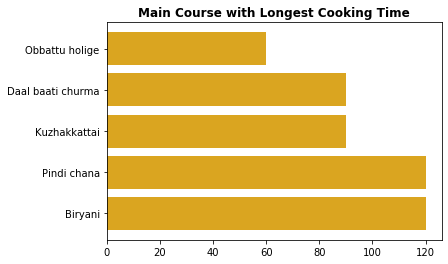

In [150]:
plt.barh(names,values,color = 'goldenrod')
plt.title('Main Course with Longest Cooking Time', fontdict = {'fontweight' : 'bold'})